Importing required libraries

In [19]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Reading the  training dataset

In [20]:
data=pd.read_csv('train.csv')

Checking for null values

In [21]:
data.isnull().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

Checking for Maximum occuring element to fill null values

In [22]:
uni=list(data['sex_upon_outcome'].unique())
vals=list(data['sex_upon_outcome'].values)
for j in uni:
    print(vals.count(j),j)

17559 Neutered Male
15499 Spayed Female
5378 Intact Female
5564 Intact Male
3802 Unknown
1 nan


In [23]:
uni1=list(data['sex_upon_intake'].unique())
vals1=list(data['sex_upon_intake'].values)
for k in uni1:
    print(vals1.count(k),k)

8459 Neutered Male
7397 Spayed Female
13480 Intact Female
14664 Intact Male
3802 Unknown
1 nan


In [24]:
data['sex_upon_outcome']=data['sex_upon_outcome'].fillna('Neutered Male')
data['sex_upon_intake']=data['sex_upon_intake'].fillna('Intact Male')

Checking for correlated features

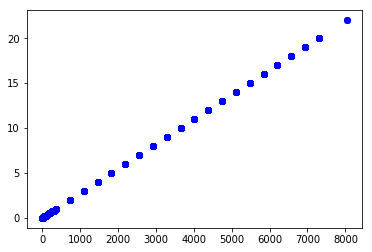

In [25]:
plt.plot(data['age_upon_outcome_(days)'],data['age_upon_outcome_(years)'],'bo')

Removing irrelavant features

In [26]:
data1=data.drop(['outcome_datetime'],axis=1)

In [27]:
data2=data1.drop(['age_upon_outcome_(days)','age_upon_intake','age_upon_intake_(days)','age_upon_outcome','intake_monthyear'],axis=1)

In [28]:
ide=data2['animal_id_outcome']
traindata=data2.drop(['animal_id_outcome','intake_datetime','outcome_monthyear','time_in_shelter','date_of_birth','count'],axis=1)

In [29]:
traindata.isnull().sum()

dob_year                      0
dob_month                     0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_month                  0
intake_year                   0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter_days          0
sex_upon_outcome              0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_month                 0
outcome_year                  0
outcome_weekday               0
outcome_hour                  0
outcome_number                0
outcome_type                  0
dtype: int64

Declaring the target variable

In [30]:
Y=traindata['outcome_type']

In [31]:
X=traindata.drop(['outcome_type'],axis=1)
features=list(set(X.columns) - set(X.describe().columns))

Encoding the features to feed into machine learning models

In [32]:
for m in features:
    le=preprocessing.LabelEncoder()
    le.fit(X[m])
    le.transform(X[m])
    X[m]=le.fit_transform(X[m])

Dividing dataset into training and testing  parts 

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

Tuning of parameters for RandomForestClassifier using cross validation to improve accuracy

In [34]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    pred1 = rf.predict(x_test)
    print(accuracy_score(y_test,pred1))

0.4544389590829219
0.47092293531922014
0.544222240816668
0.5743452430758932
0.6024600451845034
0.6103254957744122
0.6172705212952891
0.6181909463643209
0.6181072713580453


In [35]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    pred2 = rf.predict(x_test)
    print(accuracy_score(y_test,pred2))

0.4625554346916576
0.5127604384570329
0.5360220902016568
0.5320893649067023
0.5527570914567819
0.5687390176554263
0.5837168437787633
0.5921680194126014
0.6015396201154715
0.607229520542214
0.6056396954229771
0.6082336206175215
0.6088193456614509
0.612835745962681
0.6115806208685466
0.6103254957744122
0.6077315705798678
0.6067274705045603
0.6024600451845034
0.5950966446322483
0.5941762195632164
0.590494519287089
0.5913312693498453
0.5873985440548908
0.5826290686971801
0.5843025688226927
0.5917496443812233
0.5833821437536608
0.5838841937913145
0.5845535938415195
0.585557693916827
0.5814576186093214


In [36]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    pred3 = rf.predict(x_test)
    print(accuracy_score(y_test,pred3))    

0.5354363651577274
0.5269851895238892
0.4962764622207347
0.48180068613505145
0.5132624884946866
0.4846456363484227
0.2710233453267509
0.2710233453267509
0.2710233453267509
0.2710233453267509


In [38]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(x_train, y_train)
    pred4 = rf.predict(x_test)
    print(accuracy_score(y_test,pred4))

0.5463977909798343
0.5712492678436951
0.5812902685967701
0.5869801690235127
0.5847209438540708
0.5932557944941846
0.5882352941176471
0.5868964940172371
0.5861434189607564
0.5875658940674421
0.5913312693498453
0.5889883691741277
0.5838841937913145
0.5845535938415195
0.5873148690486152
0.589155719186679
0.5884026441301983
0.5882352941176471
0.5838005187850389
0.5863944439795833
0.5869801690235127
0.5811229185842189
0.5858087189356539


Training the model with suitable parameters

In [39]:
Rf=RandomForestClassifier(n_estimators=800,max_depth=14,max_features=11)
Rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Reading the test dataset

In [40]:
test=pd.read_csv('test.csv')

Separating the ID column

In [41]:
ide1=test['animal_id_outcome']


Removing the irrelevant features

In [42]:
X_test=test.drop(['outcome_datetime','age_upon_outcome_(days)','age_upon_intake','age_upon_intake_(days)','age_upon_outcome','intake_monthyear','intake_datetime','outcome_monthyear','time_in_shelter','date_of_birth','count','animal_id_outcome'],axis=1)

Encoding the features

In [43]:
for h in features:
    le=preprocessing.LabelEncoder()
    le.fit(X_test[h])
    le.transform(X_test[h])
    X_test[h]=le.fit_transform(X_test[h])

Predicting the animal states with our trained model

In [47]:
pred_=Rf.predict(X_test)

Output the predicted states in CSV format 

In [48]:
df3 = pd.DataFrame({'outcome_type': pred_})
result = pd.concat([ide1, df3], axis=1, join='inner')

In [49]:
result.to_csv('my_submission.csv')